### IDs:
Insert yours IDs to the cell below

ID #1: 034537969

ID #2: 322156159

Ido Hadanny 
Ilia Kohanovski

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 1% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 75% probability of having at least one defective product in the batch sent?
Write a function that computes this.

$1-0.99^n > 0.75$

$0.25 > 0.99^n$

$log(0.25) > n*log(0.99)$

$log(0.25) / log(0.99) < n$ (because $0.99<1$)


In [1]:
import numpy as np
def at_least_one_in_batch(p, p_required):    
    return int(np.ceil(np.log(1-p_required) / np.log(1-p)))
at_least_one_in_batch(0.01, 0.75)

138

#### Answer the same question but where:
#### 1.B.1 
Products are 4% defective and we want a 95% probability of at least one defective product in the batch

In [2]:
at_least_one_in_batch(0.04, 0.95)

74

#### 1.B.2
Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch

In [3]:
from scipy.stats import binom
def at_least_x_in_batch(p, required_p, x):
    n, actual_p = 0, 0
    while actual_p < required_p:
        n += 1
        actual_p = 1-binom.cdf(k=x-1, p=p, n=n)
    return n
at_least_x_in_batch(0.1, 0.90, 5)

78

#### 1.B.3
Products are 20% defective and we want a 90% probability of at least 10 defective products in the batch

In [4]:
at_least_x_in_batch(0.2, 0.90, 10)

69

#### 1.C
Can you comment on the difference between the answer 1.B.2 and that of 1.B.3?

the intuitive expectation that there would be no difference is wrong, as if we would multiply p by 10 (100%) and also the required x by 10 (50), it's obvious that we'll get 50 and not 78. 

In [5]:
at_least_x_in_batch(1, 0.90, 50)

50

### Question 2 - Formula

#### 2.A
Prove (you can use what you learned in class. In particular - linearity of variance for independent random variables):

$$g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = np\big(1+p(n-1)\big)$$

if X~Bin(n,p):

$g(n,p)   \equiv E(X^2) = Var(X) + E^2(X) = np(1-p) + (np)^2 = np(1+np-p) = np(1+p(n-1))$

#### 2.B
Use this formula to compute  (n = 5000, p = 0.1, 0.2, 0.3). What is the complexity of this calculation, in terms of n?

In [6]:
def g(n, p):
    return n*p*(1+p*(n-1))
for p in [0.1, 0.2, 0.3]:
    print(f"{g(5000, p):.2f}")

250450.00
1000800.00
2251050.00


the complexity is O(1)

#### 2.C
Consider the function:
$$f(n,p) = \sum_{k=0}^{n} {n \choose k} k^3 p^k (1-p)^{(n-k)}$$

Describe how $f(n,p)$ can be computed using a process that requires a constant number of multiplications and additions, regardless of n.
Use your process to compute the values of $f(n=10000, p=0.05, 0.1, 0.2, 0.3)$ in O(1).<br>
Explain all your steps. 
 

if X~Bin(n,p):

$E(X^3-E(X)^3) = np(1-p)(1-2p)$                   &emsp;(from wikipedia)

$=E(X^3) - 3E(X)E(X^2) + 3E(X)^2E(X)-E(X)^3$      &emsp;(from linearity of expectation)

$=f(n,p) - 3E(X)g(n,p) - 2E(X)^3$                 &emsp;(by definition)

$f(n,p) = np(1-p)(1-2p) + 3g(n,p)np + 2n^3p^3$    &emsp;(algebra)

In [7]:
def f(n, p):
    return n*p*(1-p)*(1-2*p)+3*g(n, p)*n*p + 2*n**3*p**3
for p in [0.05, 0.1, 0.2, 0.3]:
    print(f"{f(10000, p):.2f}")

625712927.50
5002700720.00
40009600960.00
135018900840.00


### Question 3 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 
The population of SH and RG is 12K and 18K respectively. <br>
Here are some findings of the survey:
* The mean rent in SH and RG is 5100RCU and 3700RCU respectively.
* The median rent is 4000RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 3.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [8]:
from scipy.stats import iqr
def print_stats(x, name):
    print(f"{name} len {len(x)} mean {np.mean(x):.2f} median {np.median(x):.2f} iqr {iqr(x):.2f} var {np.var(x):.2f} std {np.std(x):.2f}")

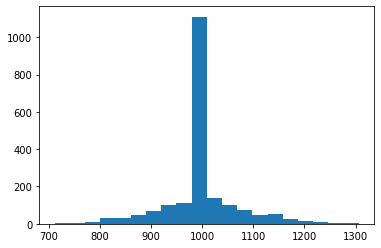

In [10]:
import matplotlib.pyplot as plt
def normal_with_pointy_head(median, width, n):
    x = np.random.normal(median, width, n//2)
    offset = median - np.mean(x)
    x += offset
    return np.concatenate([x, np.array([median]*(n//2))])
plt.hist(normal_with_pointy_head(1000, 100, 2000), bins=20)
plt.show()

we'll add 2 lumps from both sides of the median for changing the mean while keeping the median, one lump at distance $a$ and the other at distance $b$ from the median:
$\mu_{desired}*n_{desired} = \mu_{current}*n_{current} + n_{lump}*({median}_{current} + a) + n_{lump}*({median}_{current} + b)$

$a+b=\frac{\mu_{desired}*n_{desired} - \mu_{current}*n_{current}}{n_{lump}}-2*{median}_{current}$

In [15]:
def change_mean_while_keeping_median(x, desired_mean, desired_n, alpha=1.5):
    current_mean = np.mean(x)
    current_median = np.median(x)
    current_n = len(x)
    lump_n = (desired_n - current_n) // 2
    s = (desired_mean*desired_n - current_mean*current_n)/lump_n - 2*current_median
    a, b = alpha*s, (1-alpha)*s
    a_lump = normal_with_pointy_head(a+current_median, lump_n/10, lump_n)
    b_lump = normal_with_pointy_head(b+current_median, lump_n/10, lump_n)
    return np.append(np.append(x, a_lump), b_lump)

In [16]:
import matplotlib.pyplot as plt
def plot_them(sh, rg):
    binwidth=100
    all_data = np.concatenate([sh, rg])
    bins = np.arange(min(sh), max(sh) + binwidth, binwidth)
    plt.hist(sh, bins=bins, alpha=0.5, label='sh')
    plt.hist(rg, bins=bins, alpha=0.5, label='rg')
    plt.legend()
    plt.show()

In [17]:
def do_it(main_lump=0.8, alpha_sh=1.5, alpha_rg=1.5):
    sh = normal_with_pointy_head(4000, 1000, int(12000*main_lump))
    rg = normal_with_pointy_head(4000, 1500, int(18000*main_lump))

    sh = change_mean_while_keeping_median(sh, 5100, 12000, alpha=alpha_sh)
    rg = change_mean_while_keeping_median(rg, 3700, 18000, alpha=alpha_rg)
    print_stats(sh, "sh")
    print_stats(rg, "rg")
    plot_them(sh, rg)


sh len 12000 mean 5100.00 median 4000.00 iqr 638.61 var 20722212.52 std 4552.17
rg len 18000 mean 3700.00 median 4000.00 iqr 938.61 var 2715710.87 std 1647.94


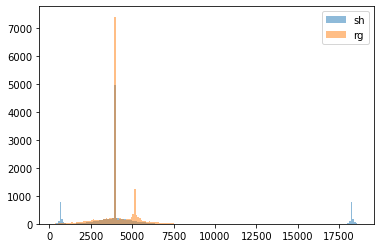

In [18]:
do_it(main_lump=0.8, alpha_sh=1.3, alpha_rg=1.4)

sh len 12000 mean 5100.00 median 4000.00 iqr 629.63 var 12562142.65 std 3544.31
rg len 18000 mean 3700.00 median 4000.00 iqr 738.89 var 1907163.87 std 1381.00


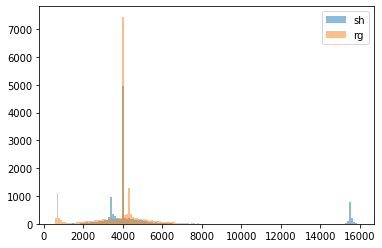

In [19]:
do_it(main_lump=0.8, alpha_sh=1.05, alpha_rg=1.1)

#### 3.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG 

sh len 12000 mean 5100.00 median 4000.00 iqr 1980.05 var 14230477.25 std 3772.33
rg len 18000 mean 3700.00 median 4000.00 iqr 2163.35 var 1741525.72 std 1319.67


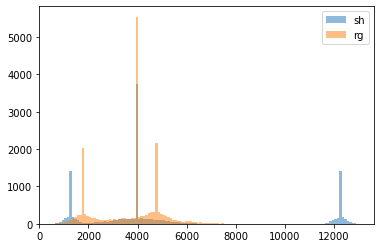

In [20]:
do_it(main_lump=0.6)

The survey also examined the per household income (PHI) in these two places.<br>
It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500
* The median is 12000 in SH and 8000 in RG
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 3.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [21]:
def gen_distrib(n, mean, median):
    x = normal_with_pointy_head(median, median/4, int(n*0.7))
    x = change_mean_while_keeping_median(x, mean, n, alpha=1.5)
    return x
    
sh_phi = gen_distrib(12000, 12500, 12000)
rg_phi = gen_distrib(18000, 8500, 8000)

print_stats(sh_phi, "sh_phi")
print_stats(rg_phi, "rg_phi")

def make_rent(phi, beta):
    meani = np.mean(phi)
    return np.array(
        [x if idx < beta*len(phi) else meani for idx, x in enumerate(phi)])

def find_alpha_rent(phi, required_alpha):
    for beta in np.arange(0, 1, 0.01):
        rent = make_rent(phi, beta)
        cov = np.cov(phi, rent)[0,1]
        alpha = cov/np.sqrt(np.var(phi)*np.var(rent))
        if alpha >= required_alpha:
            print(f"alpha {alpha}")
            return rent

sh_rent = find_alpha_rent(sh_phi, 0.97)
rg_rent = find_alpha_rent(rg_phi, 0.89)


sh_phi len 12000 mean 12500.00 median 12000.00 iqr 3161.50 var 7101219.91 std 2664.81
rg_phi len 18000 mean 8500.00 median 8000.00 iqr 2208.99 var 5331889.97 std 2309.09


/Users/hadanny/ws/stat3620/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


alpha 0.9725846594246534
alpha 0.8953718427510365


#### 3.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selcted bining resolution.

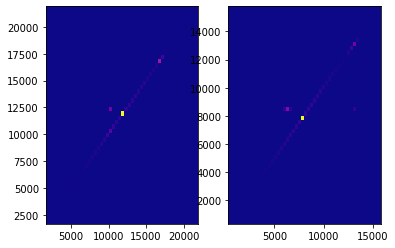

In [22]:
plt.subplot(1,2,1)
plt.hist2d(sh_phi, sh_rent, bins=50, cmap='plasma')
plt.subplot(1,2,2)
plt.hist2d(rg_phi, rg_rent, bins=50, cmap='plasma')
plt.show()

### Question 4 - Covariance and independence

#### 4.A
Define two random variables X and Y over the same probability space so that<br>
* E(X) = the sum of digits of the date you were born on (sum of all in DD/MM/YYYY)
* E(Y) = the sum of the two last digits of your id number

And so that X and Y are:
* NOT correlated (Cov(X,Y) = 0) and NOT independent.

In [23]:
my_bdate = '06111977'
my_id = '034537969'
e_x = sum([int(c) for c in my_bdate])
e_y = sum([int(c) for c in my_id[-2:]])
print(e_x, e_y, e_x*e_y)


32 15 480


In [24]:
import pandas as pd
p1 = 0.8
p2 = 1-0.8
p = pd.DataFrame([{"x": -1, "y": 0, "p": p2/3},
              {"x": 1, "y": 0, "p": p2/3},
              {"x": 0, "y": e_y*3, "p": p2/3},
              {"x": e_x/p1, "y": 15, "p": p1},
             ])
p

,x,y,p
0,-1.0,0,0.066667
1,1.0,0,0.066667
2,0.0,45,0.066667
3,40.0,15,0.800000


In [25]:
e_x = p.apply(lambda x: x['x']*x['p'], axis = 1).sum()
e_y = p.apply(lambda x: x['y']*x['p'], axis = 1).sum()
e_xy = p.apply(lambda x: x['x']*x['y']*x['p'], axis = 1).sum()

print(e_x*e_y, e_xy)

480.0 480.0


#### 4.B
Can you define random variables that are independent and so that Cov(X,Y) > 0?<br>
Explain.


no, if they are independent than cov(X,Y)=0

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [26]:
import itertools
from functools import reduce
from collections import defaultdict

P = {1: 0.3, 2: 0.4, 3:0.3}

def prod(l):
    return reduce(lambda x, y: x * y, l, 1)

def NFoldConv(P, n):
    res = defaultdict(float)
    for comb in itertools.combinations_with_replacement(P, n):
        res[sum(comb)] += prod([P[c] for c in comb])
    return res

NFoldConv(P, 3)

defaultdict(float,
            {3: 0.027,
             4: 0.036,
             5: 0.075,
             6: 0.1,
             7: 0.07500000000000001,
             8: 0.036,
             9: 0.027})

#### 5.B
Compute the distribution of the sum of the results of rolling a fair dice 8 times

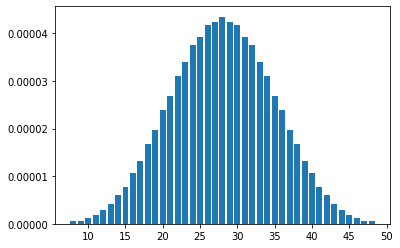

In [27]:
import matplotlib.pyplot as plt
P = {k: 1/6 for k in range(1,7)}
Q = NFoldConv(P, 8)
plt.bar(Q.keys(), Q.values())
plt.show()

#### 5.C
Assume that the price of a stock changes in any given day according to (in NIS):
$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.2 & 0.25 & 0.35 & 0.05 & 0.15
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

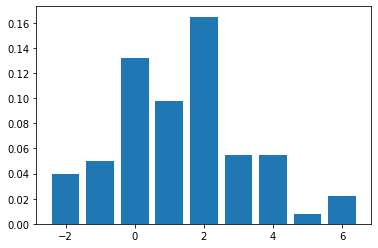

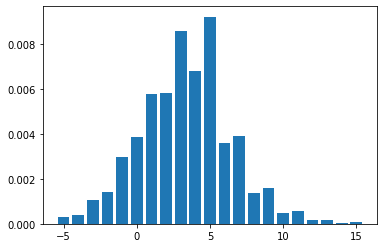

In [31]:
P = {-1:0.2, 0:0.25, 1:0.35, 2:0.05, 3:0.15}
Q = NFoldConv(P, 2)
plt.bar(Q.keys(), Q.values())
plt.show()
Q = NFoldConv(P, 5)
plt.bar(Q.keys(), Q.values())
plt.show()

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 7NIS?

In [32]:
Q5 = NFoldConv(P, 5)
print(sum([v for (k,v) in Q5.items() if k > 7]))
print(sum([v for (k,v) in Q5.items() if k < 7]))


0.004496874999999999
0.049762499999999994


### Question 6 - Poisson mode

Let $X\sim{}Poi(λ)$<br>
#### 6.A
Find the mode of X and prove your calculation.

as k takes only integer values, we can look at the difference between 2 consecutive values (instead of differentiating):
$diff(k) = Pr(X=k+1)-Pr(X=k) = \frac{\lambda^{k+1}e^{-\lambda}}{(k+1)!} - \frac{\lambda^ke^{-\lambda}}{k!}$

$= e^{-\lambda}\lambda^k\frac{\lambda-(k+1)}{(k+1)!} $


the only part that can get negative is $\lambda-(k+1)$. we can see that it starts positive, than once $k = floor(\lambda)$ it will get negative, so $floor(\lambda)$ is the mode. 

For the special case when $\lambda$ is integer we will have 2 modes: $diff(\lambda-1) = 0$, so it will be $\lambda-1, \lambda$ 

#### 6.B
Plot the pdf of $X$ for $\lambda=4, \lambda=9.3, \lambda=25.8$.<br>
Show the following quantities on your plots:
* The mode of $X$
* The median of $X$
* $\mu(X)$

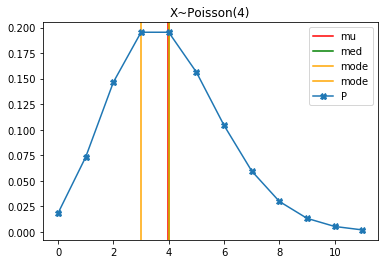

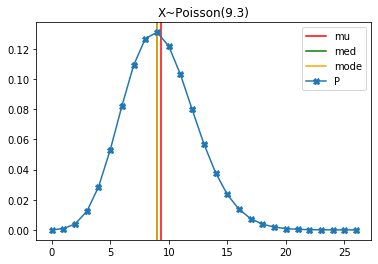

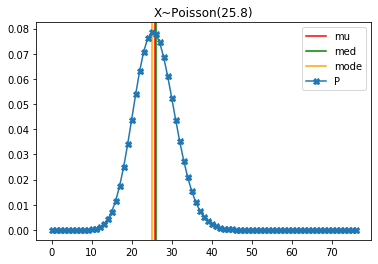

In [30]:
import numpy as np
import math
def poisson(k, lamb):
    return lamb**k*np.exp(-lamb)/math.factorial(k)

def find_median(X, P):
    c = 0
    for idx, v in enumerate(P):
        c += v
        if c >= 0.5:
            return X[idx]
        
def find_modes(X, P):
    maxi = max(P)
    modes = [X[idx] for idx, p in enumerate(P) if p == maxi]
    return modes
    
for lamb in [4, 9.3, 25.8]:
    X = np.arange(0,int(3*lamb),1)
    P = [poisson(x, lamb) for x in X]
    mu = np.dot(X, P)
    med = find_median(X, P)
    modes = find_modes(X, P)
    plt.axvline(x=mu, label='mu', color='r')
    plt.axvline(x=med, label='med', color='g')
    for mode in modes:
        plt.axvline(x=mode, label='mode', color='orange')
        
    plt.plot(X, P, marker='X', label='P')
    plt.title(f"X~Poisson({lamb})")
    plt.legend()
    plt.show()